# CC3001 Otoño 2023 Tarea 4
# Generación de código

Profesores: Iván Sipirán / Nelson Baloian / Patricio Poblete


El objetivo de esta tarea es aprender sobre la manipulación de árboles que representan fórmulas. Hay muchas cosas que uno puede hacer con estos árboles, y en esta tarea nos enfocaremos en particular en algo que los compiladores hacen: la **generación de código** para evaluar fórmulas.

Específicamente, el problema es: dada una fórmula, generar una secuencia de instrucciones elementales que la evalúen. Por ejemplo, dada una fórmula como

```
(a+b)*(c-d)
```

se podría generar código como el siguiente:

```
t1=a+b
t2=c-d
t3=t1*t2
```

Las instrucciones elementales son siempre de la forma ``ti=x op y``, donde ``ti`` es una variable temporal, ``x`` e ``y`` pueden ser variables o números, y ``op`` es un operador. Uno va creando variables ``t1``, ``t2``, ... a medida que las necesita, y la última de ellas es la que almacena el valor final de la fórmula.

Las fórmulas pueden ser arbitrariamente complicadas, como por ejemplo la fórmula

$$
(2-p\,q)\left( \frac{1}{n}+\frac{1}{p+q}\right)
$$

la cual escribimos como

```
(2-p*q)*(1/n+1/(p+q))
```

y cuyo código generado podría ser,

```
t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6
```

El objetivo de esta tarea es que usted implemente una función que, dado un árbol ya construído, lo recorra para generar una secuencia de instrucciones elementales que lo evalúe.

A continuación usted encontrará clases ``Nodoi``, ``Nodoe`` y ``Arbol`` que implementan árboles que representan fórmulas. La clase ``Arbol`` viene con un constructor que recibe un string como parámetro, el cual contiene una fórmula, y este constructor se encarga de transformar la fórmula de string a árbol, de modo que usted no necesita preocuparse de eso. Para simplificar, la fórmula solo podrá contener variables de una sola letra, números de un solo dígito, y sin espacios. Los operadores permitidos son solo suma, resta, multiplicación y división. No hay operador menos unario.

Usted tienen que implementar para la clase ``Arbol`` una función ``codigo`` que al ser invocado genere una secuencia de instrucciones elementales para evaluar la fórmula representada por ese árbol, y la retorne en forma de una lista (de Python).

In [ ]:
# Ejecutar esto para poder visualizar los árboles

!pip install aed-utilities

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4542 sha256=c9f3ef82bf083ebdc0e3b724fe8719b091032075a0af5313c38f686a4e1e563a
  Stored in directory: /root/.cache/pip/wheels/db/6d/39/cc766f956b1e504722228ad30c8154cd48f4470e7e24dcfd0e
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=157c2ecc9b9e5347f6da1c43d0787621f35736bfdf7caf8791c9b9eb88a80277
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built aed-utilities validators


In [ ]:
import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self, a):
        self.izq.postorden(a)
        self.der.postorden(a)
        a+= self.info

class Nodoe:
    def __init__(self, info):
        self.info=info
    def postorden(self, a):
        a += [self.info]

class Arbol:
    def __init__(self,formula):
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False

        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False
        self.raiz=a

    def postorden(self):
        a = []
        self.raiz.postorden(a)
        return a

    def codigo(self):
        s = []
        l = []
        i = 1
        for e in self.postorden():
          if e.isalnum():
              s.append(e)
              if len(self.postorden()) == 1:
                x = s.pop()
                linea = f"t{i}={x}"
                l.append(linea)
                return l
          else:
              op = e
              y = s.pop()
              x = s.pop()
              linea = f"t{i}={x}{op}{y}"
              s.append(f"t{i}")
              l.append(linea)
              i += 1
        return l

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

A continuación probamos esta funcionalidad con varias fórmulas de ejemplo. Para ver si el árbol fue construido correctamente, lo dibujamos.

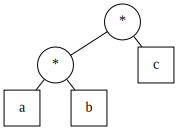

In [ ]:
Arbol("a*b*c").dibujar()

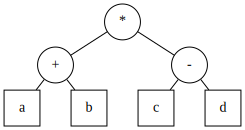

In [ ]:
Arbol("(a+b)*(c-d)").dibujar()

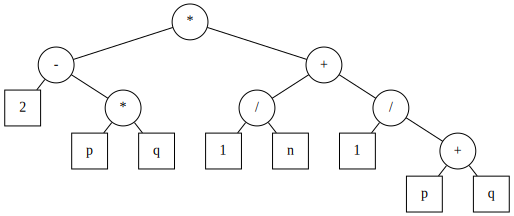

In [ ]:
Arbol("(2-p*q)*(1/n+1/(p+q))").dibujar()

## Resultados

En esta sección probamos la generación de código que usted tiene que escribir. Mientras usted no sustituya la función ``codigo`` provisoria que viene en la definición de la clase, va a aparecer la lista que generamos ahí. Primero vamos a definir una función ``probar`` que genera el código a partir de una fórmula dada e imprime el resultado:

In [ ]:
def probar(formula):
    a=Arbol(formula)
    for x in a.codigo():
        print(x)

A continuación probamos con varias fórmulas. Además de las fórmulas dadaas, usted tiene que agregar tres ejemplos adicionales.

In [ ]:
probar("a+1")

t1=a+1


In [ ]:
probar("(a+b)*(c-d)")

t1=a+b
t2=c-d
t3=t1*t2


In [ ]:
probar("(2-p*q)*(1/n+1/(p+q))")

t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6


In [ ]:
probar("((((a+b)+c)+d)+e)")

t1=a+b
t2=t1+c
t3=t2+d
t4=t3+e


In [ ]:
probar("(a+(b+(c+(d+e))))")

t1=d+e
t2=c+t1
t3=b+t2
t4=a+t3


In [ ]:
probar("a")

t1=a


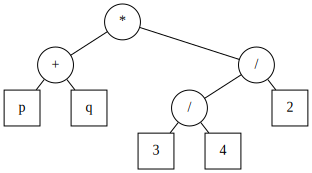

t1=p+q
t2=3/4
t3=t2/2
t4=t1*t3


In [ ]:
Arbol("(p+q)*((3/4)/2)").dibujar()
probar("(p+q)*((3/4)/2)")

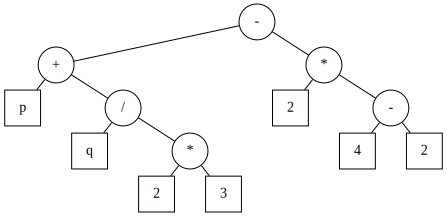

t1=2*3
t2=q/t1
t3=p+t2
t4=4-2
t5=2*t4
t6=t3-t5


In [ ]:
Arbol("(p+(q/(2*3)))-(2*(4-2))").dibujar()
probar("(p+(q/(2*3)))-(2*(4-2))")

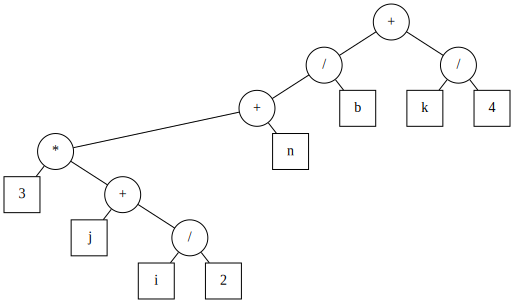

t1=i/2
t2=j+t1
t3=3*t2
t4=t3+n
t5=t4/b
t6=k/4
t7=t5+t6


In [ ]:
Arbol("(((3*(j+i/2)+n)/b))+k/4").dibujar()
probar("(((3*(j+i/2)+n)/b))+k/4")